## Loading the libraries and dataset

In [22]:
# Import all of the relevant moduldes 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

In [23]:
# Load the csv file into a DataFrame using pandas
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis

In [24]:
# Using describe to get statistical insights on the data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [25]:
# Obtain the object counts of unique values 
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Visualisation

Plotting graphs or any other kind of visualisations assists to determine relationships in the data which are otherwise not obvious and to communicate information to end users more clearly.

The histograms below helps convey the statistical information on the categorical data returned by the describe() function, including the skewness of each variable.

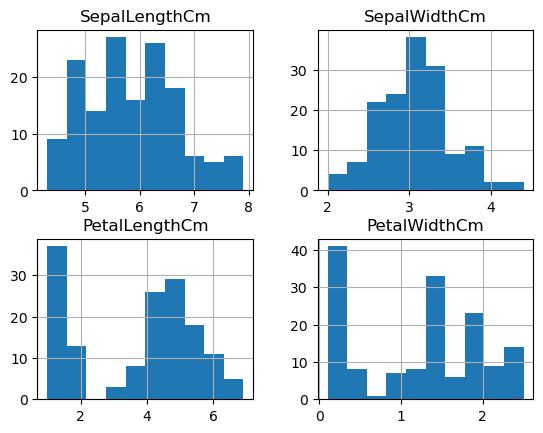

In [26]:
# Plot histograms using Matplotlib
df2 = df.drop("Id", axis=1)
df2.hist()
plt.show()

The scatter plot below differentiates the iris flowers according to their species based on their sepal_length and sepal_width.

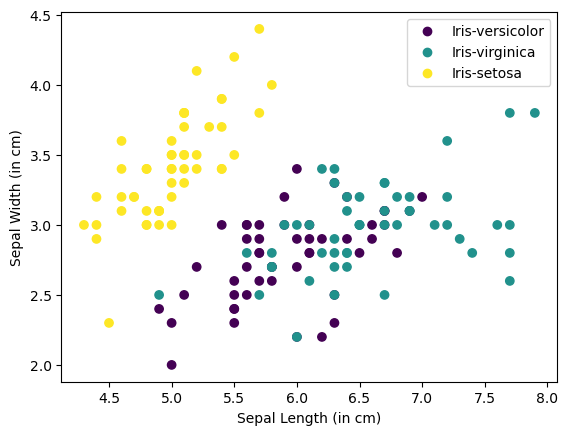

In [27]:
species_name = {'Iris-versicolor':0, 'Iris-virginica':1,'Iris-setosa':2}

# Use for loop to colour code the species
colour = [species_name[item] for item in df['Species']]

# Plot the scatter plot using Matplotlib
scatter_plot = plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'],c=colour)
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.legend(handles = scatter_plot.legend_elements()[0], labels = species_name)
plt.show()

## Determining input and output variables

The data is separated into input and output value where X is a feature and y is a target, and this is important in machine learning algorithms to train and test the data.

In [28]:
X = df.drop("Species", axis=1)
X.head()

y = df["Species"]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

## Training and Testing the Data

This step is done to assess how well the data would perform as the model will be making predictions based on unseen data. The dataset is split into training data and testing data at a 70:30 ratio.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print(X_train.shape)
print(X_test.shape)

(105, 5)
(45, 5)


## Normalisation of the Data

Normalisation is a method of processing the data to be used for machine learning purposes to change the values of columns containing quantitative data to use a common scale without distorting differences in the ranges of values or losing information. Min-max normalization is a well-known technique where for every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1.

In [30]:
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

## Using the KNN Classifier

The KNN algorithms use data and class new data points based on similarity measures.

In [31]:
classifier1= KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Testing Data

In [32]:
y_pred1 = classifier1.predict(X_test)
y_pred1

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [33]:
y_test

136     Iris-virginica
142     Iris-virginica
39         Iris-setosa
44         Iris-setosa
50     Iris-versicolor
23         Iris-setosa
90     Iris-versicolor
149     Iris-virginica
46         Iris-setosa
55     Iris-versicolor
21         Iris-setosa
147     Iris-virginica
47         Iris-setosa
123     Iris-virginica
67     Iris-versicolor
134     Iris-virginica
68     Iris-versicolor
65     Iris-versicolor
51     Iris-versicolor
0          Iris-setosa
54     Iris-versicolor
103     Iris-virginica
24         Iris-setosa
81     Iris-versicolor
129     Iris-virginica
102     Iris-virginica
113     Iris-virginica
100     Iris-virginica
89     Iris-versicolor
110     Iris-virginica
99     Iris-versicolor
19         Iris-setosa
6          Iris-setosa
88     Iris-versicolor
86     Iris-versicolor
121     Iris-virginica
85     Iris-versicolor
37         Iris-setosa
9          Iris-setosa
61     Iris-versicolor
36         Iris-setosa
109     Iris-virginica
3          Iris-setosa
12         

## Accuracy Score, Confusion Matrix and Classification Report

Accuracy score refers to the ratio of number of correct predictions to the total number of input samples.

A confusion matrix is a table describing the performance of a classification model in supervised machine learning. It consists of 4 values namely; True positive (TP), True negative (TN), False positive (FP), False negative(FN).

A classification report consists of precision, recall and F1 score.

In [34]:
accuracy1 = accuracy_score(y_pred1, y_test)*100
print('Accuracy:', accuracy1)

Accuracy: 100.0


An accuracy score of 100% may indicate underlying issues such as overfitting which occurs when a model fits the training data perfectly, causing poor generalisation of new and unseen data.

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


<Axes: >

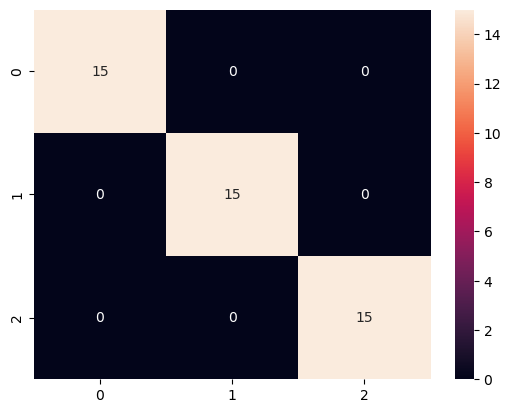

In [35]:
cm1= confusion_matrix(y_pred1, y_test)
print(cm1)
sns.heatmap(cm1, annot=True)

The confusion matrix above indicates that there are no false positives or false negatives as indicated by the zero entries in the matrix. This is further enforced by the 100% accuracy score achieved. The diagonal entries of 15 are ideal but this perfect outcome may be due to overfiting or data leakage.

In [36]:
print(classification_report(y_pred1, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



The precision, recall and F1-score are all 1 as the model's predictions match the true class labels perfectly for all three classes as shown by the confusion matrix above.

Call the KNN classifier for 50 neighbourhoods and repeat the above steps.

In [37]:
classifier2= KNeighborsClassifier(n_neighbors=50)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [38]:
y_pred2 = classifier2.predict(X_test)
y_pred2

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [39]:
accuracy2 = accuracy_score(y_pred2, y_test)*100
print("Accuracy:", accuracy2)

Accuracy: 97.77777777777777


Now applying the KNN algorithm, the accuracy score is still high. Even though it is lower than that calculated previously, it is a better outcome as it indicates that the overfitting issue has been mitigated and that the model is performing slighlty better.

[[15  0  0]
 [ 0 14  0]
 [ 0  1 15]]


<Axes: >

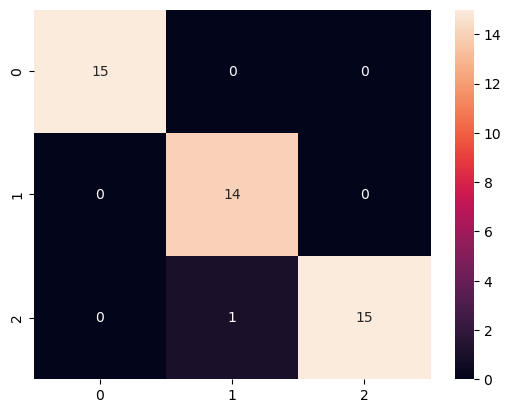

In [40]:
cm2= confusion_matrix(y_pred2, y_test)
print(cm2)
sns.heatmap(cm2, annot=True)

The consfuion matrix indicates that the model except the one Class 3 has a false positive.

In [41]:
print(classification_report(y_pred2, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

